# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 
import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = base_url + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()
        
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port moresby
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | egilsstadir
Processing Record 4 of Set 1 | nikolayevsk-on-amure
Processing Record 5 of Set 1 | tabou
Processing Record 6 of Set 1 | praia
Processing Record 7 of Set 1 | constantia
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | santa vitoria do palmar
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | bikenibeu village
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | ciudad lazaro cardenas
Processing Record 22 of

Processing Record 38 of Set 4 | bochum
Processing Record 39 of Set 4 | thongwa
Processing Record 40 of Set 4 | akureyri
Processing Record 41 of Set 4 | maragogi
Processing Record 42 of Set 4 | traralgon
Processing Record 43 of Set 4 | flying fish cove
Processing Record 44 of Set 4 | tripoli
Processing Record 45 of Set 4 | poyarkovo
Processing Record 46 of Set 4 | karasuk
Processing Record 47 of Set 4 | myawadi
City not found. Skipping...
Processing Record 48 of Set 4 | pimentel
Processing Record 49 of Set 4 | wlodawa
Processing Record 0 of Set 5 | mohr
Processing Record 1 of Set 5 | vanimo
Processing Record 2 of Set 5 | antigonish
Processing Record 3 of Set 5 | kandi
Processing Record 4 of Set 5 | manay
Processing Record 5 of Set 5 | yonggang-up
Processing Record 6 of Set 5 | ilebo
Processing Record 7 of Set 5 | dakhla
Processing Record 8 of Set 5 | pangoa
Processing Record 9 of Set 5 | sao joao da barra
Processing Record 10 of Set 5 | camana
Processing Record 11 of Set 5 | ta`u
Proces

Processing Record 35 of Set 8 | luwuk
Processing Record 36 of Set 8 | papao
Processing Record 37 of Set 8 | ondjiva
Processing Record 38 of Set 8 | aral
Processing Record 39 of Set 8 | pierre
Processing Record 40 of Set 8 | abnub
Processing Record 41 of Set 8 | port lincoln
Processing Record 42 of Set 8 | al jawf
Processing Record 43 of Set 8 | galesong
Processing Record 44 of Set 8 | sao joao do piaui
Processing Record 45 of Set 8 | nagqu
Processing Record 46 of Set 8 | al quwayrah
Processing Record 47 of Set 8 | mil'kovo
Processing Record 48 of Set 8 | sokoni
Processing Record 49 of Set 8 | galle
Processing Record 0 of Set 9 | goba
Processing Record 1 of Set 9 | pea ridge
Processing Record 2 of Set 9 | pante makasar
City not found. Skipping...
Processing Record 3 of Set 9 | rattvik
City not found. Skipping...
Processing Record 4 of Set 9 | necochea
Processing Record 5 of Set 9 | semera
Processing Record 6 of Set 9 | vytegra
Processing Record 7 of Set 9 | vila franca do campo
Processi

Processing Record 22 of Set 12 | inhambane
Processing Record 23 of Set 12 | ihosy
Processing Record 24 of Set 12 | mizan teferi
Processing Record 25 of Set 12 | guerrero negro
Processing Record 26 of Set 12 | tual
Processing Record 27 of Set 12 | paracuru
Processing Record 28 of Set 12 | smithers
Processing Record 29 of Set 12 | paghman
Processing Record 30 of Set 12 | veraval
Processing Record 31 of Set 12 | mirny
Processing Record 32 of Set 12 | alibag
Processing Record 33 of Set 12 | bel ombre
Processing Record 34 of Set 12 | as sulaymaniyah
Processing Record 35 of Set 12 | tshikapa
Processing Record 36 of Set 12 | nyurba
Processing Record 37 of Set 12 | umm al quwain city
Processing Record 38 of Set 12 | kutum
Processing Record 39 of Set 12 | cruzeiro do sul
Processing Record 40 of Set 12 | falun
Processing Record 41 of Set 12 | eldorado
Processing Record 42 of Set 12 | linares
Processing Record 43 of Set 12 | as sulayyil
Processing Record 44 of Set 12 | chernomorskoye
Processing R

In [4]:
city_json

{'coord': {'lon': 37.9333, 'lat': -9.7667},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 21.26,
  'feels_like': 22,
  'temp_min': 21.26,
  'temp_max': 21.26,
  'pressure': 1014,
  'humidity': 98,
  'sea_level': 1014,
  'grnd_level': 958},
 'visibility': 10000,
 'wind': {'speed': 0.88, 'deg': 335, 'gust': 1},
 'rain': {'1h': 0.31},
 'clouds': {'all': 100},
 'dt': 1706556757,
 'sys': {'country': 'TZ', 'sunrise': 1706498681, 'sunset': 1706543857},
 'timezone': 10800,
 'id': 155921,
 'name': 'Liwale',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port moresby,-9.4431,147.1797,26.33,79,99,1.34,PG,1706556608
1,college,64.8569,-147.8028,-30.03,66,100,0.00,US,1706556608
2,egilsstadir,65.2653,-14.3948,4.95,70,40,8.23,IS,1706556608
3,nikolayevsk-on-amure,53.1406,140.7300,-19.42,100,95,1.19,RU,1706556609
4,tabou,4.4230,-7.3528,27.32,80,3,4.42,CI,1706556609


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port moresby,-9.4431,147.1797,26.33,79,99,1.34,PG,1706556608
1,college,64.8569,-147.8028,-30.03,66,100,0.00,US,1706556608
2,egilsstadir,65.2653,-14.3948,4.95,70,40,8.23,IS,1706556608
3,nikolayevsk-on-amure,53.1406,140.7300,-19.42,100,95,1.19,RU,1706556609
4,tabou,4.4230,-7.3528,27.32,80,3,4.42,CI,1706556609


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

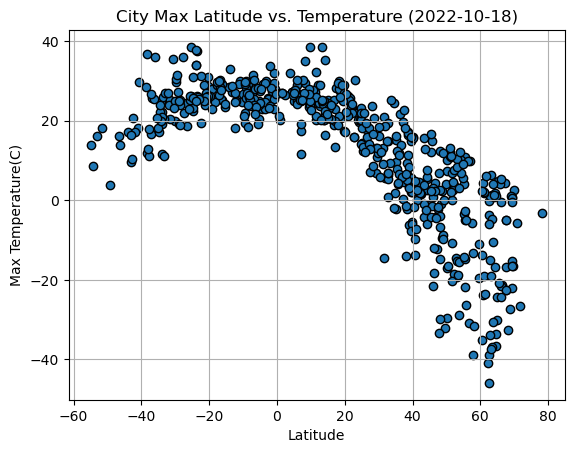

In [9]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y, edgecolor="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

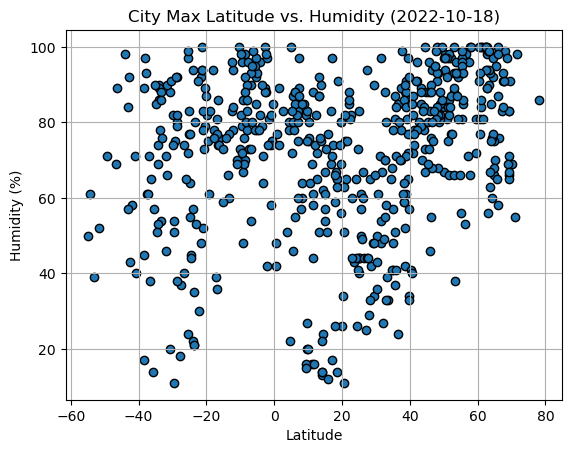

In [10]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

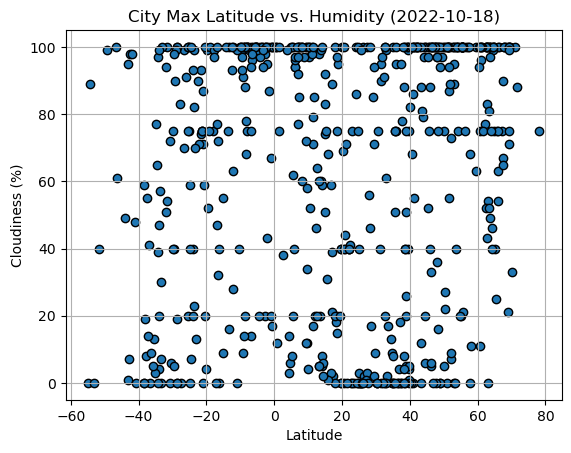

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

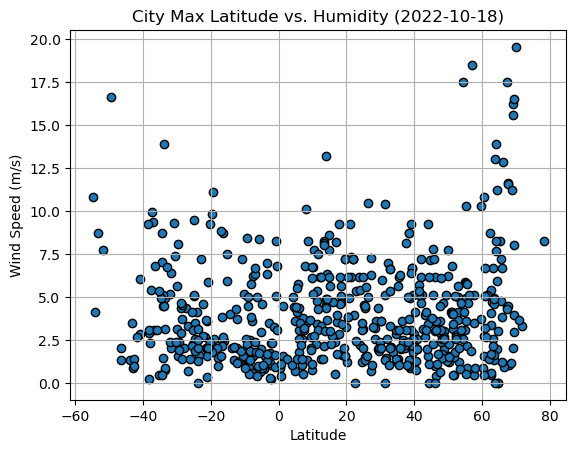

In [12]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def regression_plots(x_values,y_values, y_label, location):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values,y_values)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq, location, fontsize=15, color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,-30.03,66,100,0.00,US,1706556608
2,egilsstadir,65.2653,-14.3948,4.95,70,40,8.23,IS,1706556608
3,nikolayevsk-on-amure,53.1406,140.7300,-19.42,100,95,1.19,RU,1706556609
4,tabou,4.4230,-7.3528,27.32,80,3,4.42,CI,1706556609
5,praia,14.9215,-23.5087,25.30,57,51,7.72,CV,1706556374


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port moresby,-9.4431,147.1797,26.33,79,99,1.34,PG,1706556608
7,grytviken,-54.2811,-36.5092,8.69,61,89,4.12,GS,1706556610
8,atafu village,-8.5421,-172.5159,29.18,70,88,2.50,TK,1706556376
11,avarua,-21.2078,-159.7750,26.03,100,75,3.60,CK,1706556611
12,santa vitoria do palmar,-33.5189,-53.3681,25.32,54,30,4.93,BR,1706556457


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6484787081949608


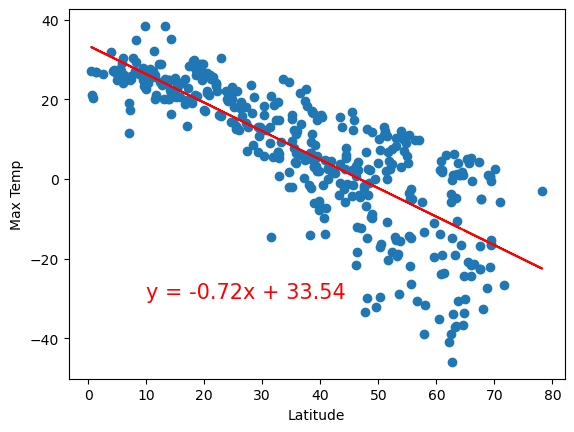

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression_plots(x_values, y_values, "Max Temp", (10,-30))

The r-squared is: 0.19631303840671802


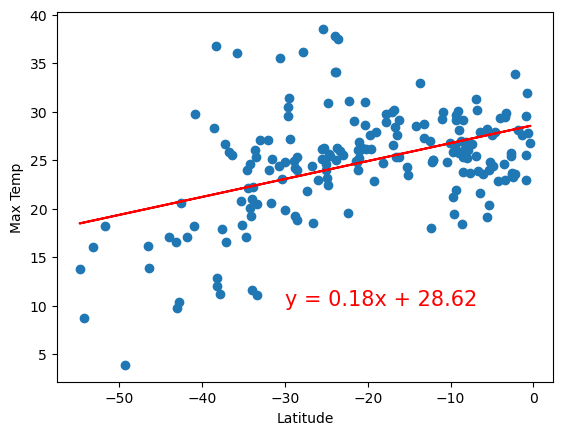

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression_plots(x_values, y_values, "Max Temp", (-30,10))

**Discussion about the linear relationship:** In the Northern Hemisphere there seems to be a negative correlation between latitude and max temp. The regression line shows a trend of decreasing temperature with increasing latitude. While the opposite is happening for the Southern Hemisphere which shows a more positive correlation between latitude and max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1794457191427637


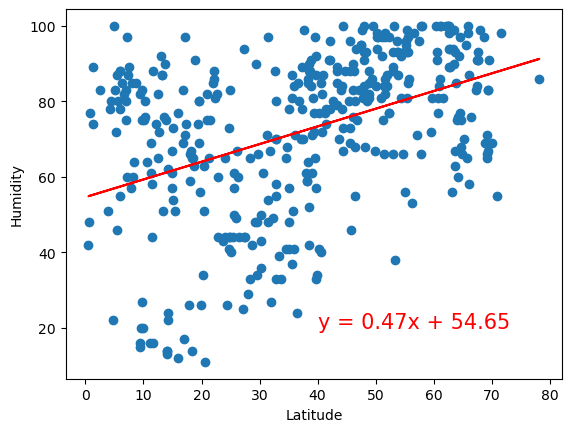

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regression_plots(x_values, y_values, "Humidity", (40,20))

The r-squared is: 0.1043864688182711


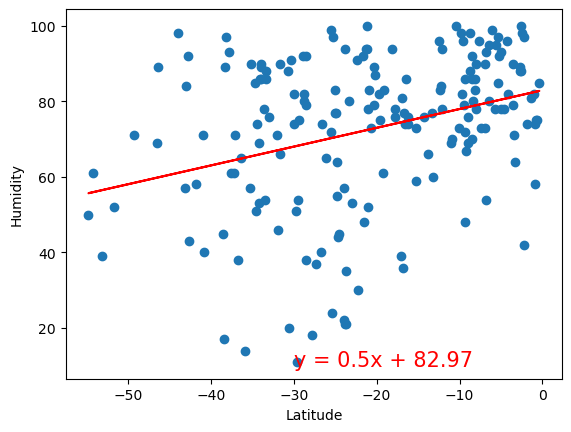

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regression_plots(x_values, y_values, "Humidity", (-30,10))

**Discussion about the linear relationship:** For both the Northern Hemisphere and the Southern Hemisphere there doesnt seem to be a strong correlation between humidity and latitude. The regression line does not seem to fit properly for the data and the points are scattered and do not follow a clear trend.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04406075921864726


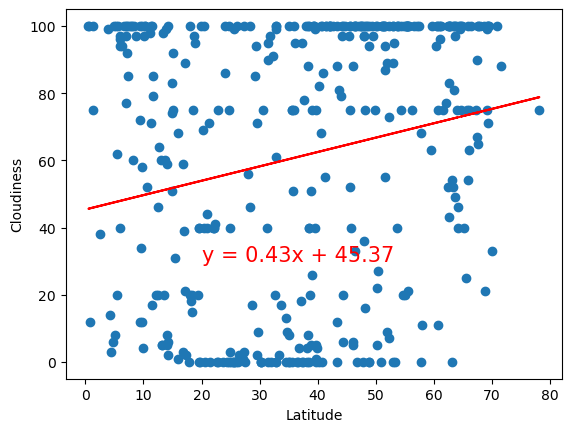

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regression_plots(x_values, y_values, "Cloudiness", (20,30))

The r-squared is: 0.15119006470094107


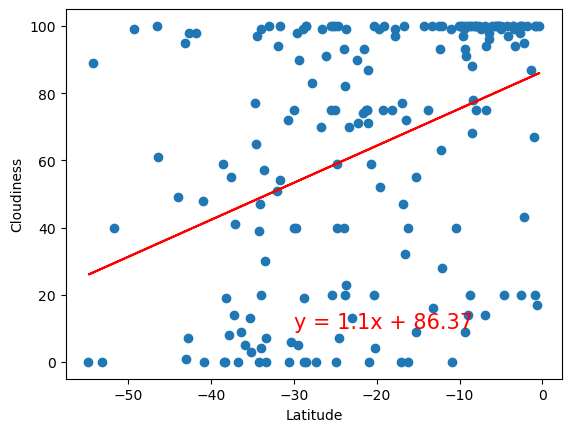

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regression_plots(x_values, y_values, "Cloudiness", (-30,10))

**Discussion about the linear relationship:** It seems the this is similar to my humidity response. There doesnt seem to be much correlation between cloudiness and latitude in either hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.020036045044551417


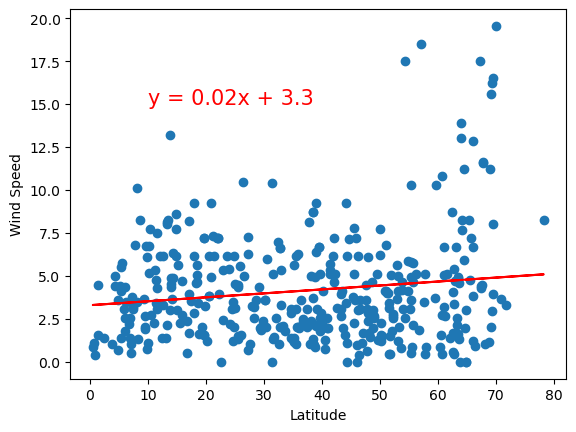

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regression_plots(x_values, y_values, "Wind Speed", (10,15))

The r-squared is: 0.065444138799499


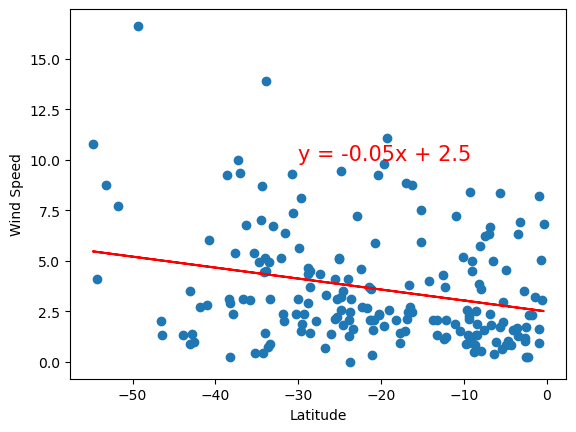

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regression_plots(x_values, y_values, "Wind Speed", (-30,10))

**Discussion about the linear relationship:** There doesnt seem to be a correlation betweem wind speed and latitude for either hemisphere. The r-squared value is close to 0 for the Northern Hemisphere which suggests that the latitude doesnt explain much variability in wind speed which is the same for the Southern Hemiphere.